In [1]:
import pandas as pd
import numpy as np
# import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython
from IPython.display import display
#import seaborn as sns

import preprocessing

seed = 1289719


In [2]:
import importlib
importlib.reload(preprocessing)

<module 'preprocessing' from 'l:\\Documents\\(8) Cairo Uni Spring 2023\\SBEN454_Machine_Learning\\Tasks & Projects\\Term Project\\CGM_Prediction_LSTM\\code\\preprocessing.py'>

## Create Train and Test Sets

In [3]:
series_min_len = 144 #12hrs
pred_horizon = 12 # 1hr
input_size = series_min_len - pred_horizon

In [5]:
#load
# import pickle
# [X_train, X_test, y_train, y_test] = pickle.load(open('timeseries_all-patients_step-1_len-6391075.pkl', 'rb'))
# print(len(X_train)+len(X_test), len(X_train), len(X_test) )
# print(len(y_train)+len(y_test), len(y_train), len(y_test))


#### All Patients - CGM only

In [6]:
num_groups = 1
series_min_len = 144 #12-36hrs
df_pt_groups_cols=["HbA1c", "BMI"]
#df_pt_groups_cols = ["BMI", "Age"]

df_cgm, df_pt_all = preprocessing.get_df_all('Data-CITY', num_groups, df_pt_groups_cols)
#PtID, HbA1c, Weight, Height, PEHeartRt, PEAbnormal, Sex, Black, White, Asian, Mixed, Uknown, Native, EducationLevel, AnnualIncome, BMI, Group

In [7]:
group_ids = df_pt_all.index
series = preprocessing.create_time_series(group_ids, df_cgm, series_min_len)
series = np.asarray(series)

In [8]:
from sklearn.model_selection import train_test_split
series_train, series_test = train_test_split(series, test_size=0.2, random_state=seed)
print(series.shape)
print(series_train.shape)
print(series_test.shape)

(6391075, 144)
(5112860, 144)
(1278215, 144)


In [9]:
print(series.shape)

(6391075, 144)


In [10]:
X_train = series_train[:, 0:input_size]
y_train = series_train[:, 1:input_size+1]

X_test = series_test[:, 0:input_size]
y_test = series_test[:, input_size:series_min_len+1]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [14]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# print(len(X), len(X_train), len(X_test))
# print(len(y), len(y_train), len(y_test))

In [15]:
#save
import pickle
pickle.dump([X_train, X_test, y_train, y_test], open('timeseries_all-patients_step-1_len-6391075.pkl', 'wb'))

#### X Clustered Patients - CGM only

In [16]:
num_groups = 3
series_min_len = 144 #12-36hrs
df_pt_groups_cols=["HbA1c", "AnnualIncome"]
# df_pt_groups_cols = ["BMI", "Age"]

df_cgm, df_pt_all_groups = preprocessing.get_df_all('Data-CITY', num_groups, df_pt_groups_cols)
#PtID, HbA1c, Weight, Height, PEHeartRt, PEAbnormal, Sex, Black, White, Asian, Mixed, Uknown, Native, EducationLevel, AnnualIncome, BMI, Group

In [17]:
from sklearn.model_selection import train_test_split
import pickle

for i in range(0, num_groups):
    print("GROUP ", i)
    group_ids =  df_pt_all_groups.get_group(i).index
    # print(group_ids)

    #TODO: train_test split patients

    series = preprocessing.create_time_series(group_ids, df_cgm, series_min_len)
    series = np.asarray(series)

    series_train, series_test = train_test_split(series, test_size=0.2, random_state=seed)
    print(series.shape)
    print(series_train.shape)
    print(series_test.shape)

    X_train = series_train[:, 0:input_size]
    y_train = series_train[:, 1:input_size+1]

    X_test = series_test[:, 0:input_size]
    y_test = series_test[:, input_size:series_min_len+1]

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    pickle.dump([X_train, X_test, y_train, y_test], open('timeseries_'+str(i)+'-patients_step-1_len-x.pkl', 'wb'))

GROUP  0
(261644, 144)
(209315, 144)
(52329, 144)
GROUP  1
(4499958, 144)
(3599966, 144)
(899992, 144)
GROUP  2
(1629473, 144)
(1303578, 144)
(325895, 144)


In [20]:
# plot time series for a patient
# unpickle and plot
import pickle
[X_train, X_test, y_train, y_test] = pickle.load(open('timeseries_all-patients_step-1_len-6391075.pkl', 'rb'))
print(len(X_train)+len(X_test), len(X_train), len(X_test) )
print(len(y_train)+len(y_test), len(y_train), len(y_test))



6391075 5112860 1278215
6391075 5112860 1278215


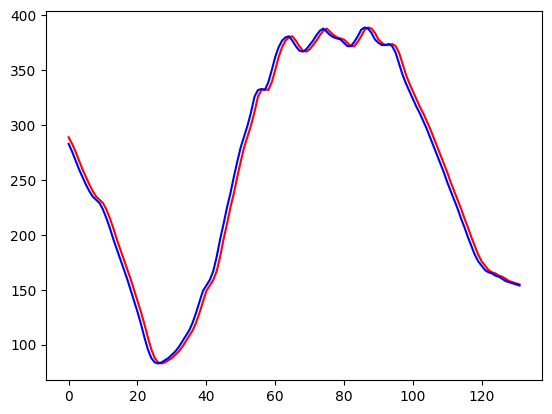

ValueError: x and y must have same first dimension, but have shapes (132,) and (12,)

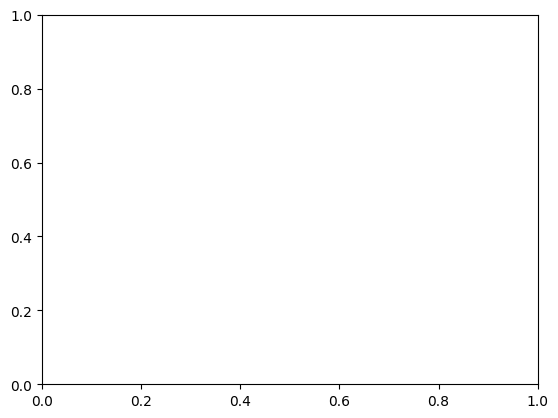

In [21]:
# plot 
import matplotlib.pyplot as plt
import numpy as np
import random

# plot x_train and y_train of a random patient
# create time series for a patient
a = X_train[0]
b = y_train[0]
t = np.arange(0, len(a), 1)
plt.plot(t, a, 'r', t, b, 'b')

plt.show()

# plot test set
a = X_test[0]
b = y_test[0]
t = np.arange(0, len(a), 1)

# plot x_test and y_test
plt.plot(t, a, 'r', t, b, 'b')
plt.show()